In [22]:
import pandas as pd
import numpy as np
import re
import collections
import seaborn as sns
import matplotlib.pyplot as plt
import  plotly
from wordcloud import WordCloud,STOPWORDS

# Packages for data preparation
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

In [10]:
# Importing the dataset

df = pd.read_csv('Tweets - Tweets.csv')
df.head()

,tweet_id,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703061e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703011e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703011e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703008e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [11]:
df.shape

(14640, 9)

In [12]:
##return percentage of every columns missing value , cols which have >90% missing values then drop them

(len(df) - df.count())/len(df)

tweet_id          0.000000
airline           0.000000
name              0.000000
retweet_count     0.000000
text              0.000000
tweet_coord       0.930396
tweet_created     0.000000
tweet_location    0.323292
user_timezone     0.329235
dtype: float64

In [13]:
df = df.drop(['tweet_coord'], axis=1)

In [14]:
df.head()

,tweet_id,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,5.703061e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703011e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703011e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703008e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [15]:
df['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

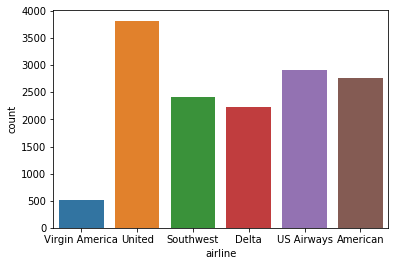

In [16]:
sns.countplot(x='airline', data = df)
plt.show()

In [17]:
df['retweet_count'].value_counts()

0     13873
1       640
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
9         1
31        1
18        1
15        1
28        1
44        1
11        1
Name: retweet_count, dtype: int64

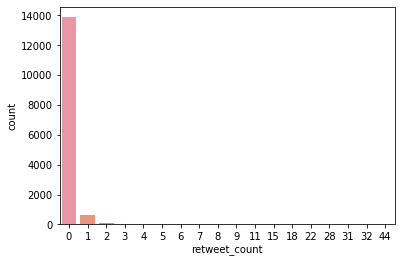

In [18]:
sns.countplot(x='retweet_count', data = df)
plt.show()

In [23]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [25]:
# Removing Twitter Handles (@user)

df['tidy_text'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*") 
df.head(2)

,tweet_id,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,tidy_text
0,5.703061e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),What said.
1,5.703011e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus you've added commercials to the experien...


In [26]:
# Removing Punctuations, Numbers, and Special Characters

df['tidy_text'] = df['tidy_text'].str.replace("[^a-zA-Z#]", " ")
df.head(2)

,tweet_id,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,tidy_text
0,5.703061e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),What said
1,5.703011e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus you ve added commercials to the experien...


In [27]:
df['tidy_text'] = df['tidy_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [28]:
#Text Normalization
#Here we will use nltk's "PorterStemmer()"" function to normalize the tweets. 
#But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

tokenized_text = df['tidy_text'].apply(lambda x: x.split()) # tokenizing
tokenized_text.head()

0                                         [What, said]
1        [plus, added, commercials, experience, tacky]
2    [didn, today, Must, mean, need, take, another,...
3    [really, aggressive, blast, obnoxious, enterta...
4                               [really, thing, about]
Name: tidy_text, dtype: object

In [29]:
#Now we can normalize the tokenized tweets.

from nltk.stem.porter import *

stemmer = PorterStemmer()
tokenized_text = tokenized_text.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming


#Now let’s stitch these tokens back together.

for i in range(len(tokenized_text)):
    tokenized_text[i] = ' '.join(tokenized_text[i])
    
df['tidy_text'] = tokenized_text

In [30]:
# Create the rank for the airline on basis of "retweet_count"

airline_ = df[['airline','retweet_count']]
cnt_airline = airline_.groupby('airline', as_index=False).count()
cnt_airline.sort_values('retweet_count', ascending=False)

,airline,retweet_count
4,United,3822
3,US Airways,2913
0,American,2759
2,Southwest,2420
1,Delta,2222
5,Virgin America,504


C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



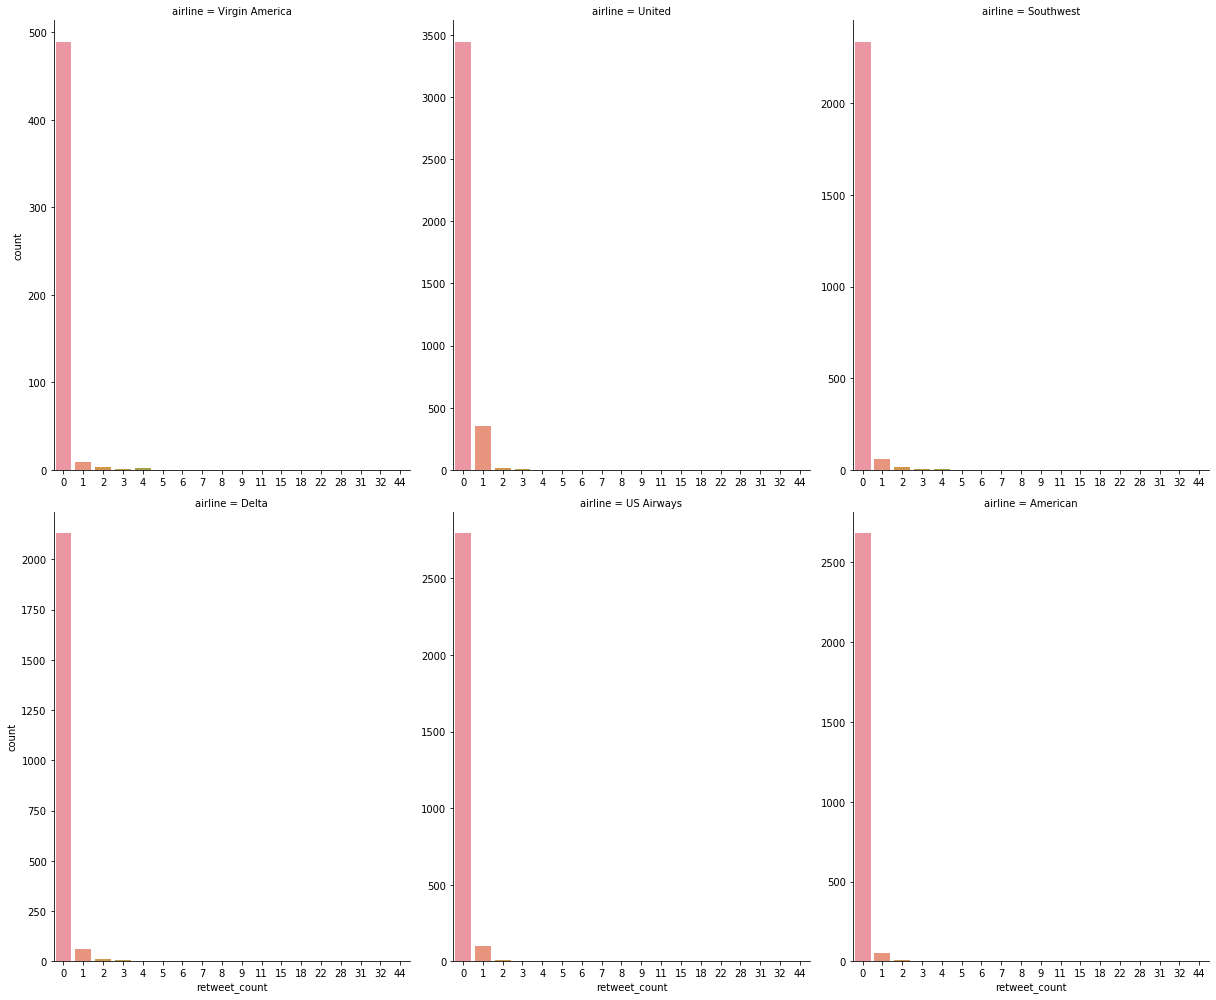

In [31]:
sns.factorplot(x = 'retweet_count', data = df, kind = 'count', col_wrap=3, col='airline', 
               size = 7, aspect = 0.8, sharex = False, sharey = False)
plt.show()

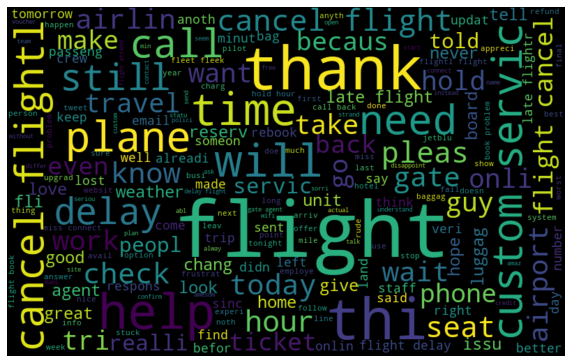

In [32]:
#visualize all the words our data using the wordcloud plot.

all_words = ' '.join([text for text in df['tidy_text']])

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [48]:
#impact of Hashtags on tweets sentiment

# function to collect hashtags

def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [49]:
# extracting hashtags from text tweets

HT_regular = hashtag_extract(df['tidy_text'])

# unnesting list
HT_regular = sum(HT_regular,[])

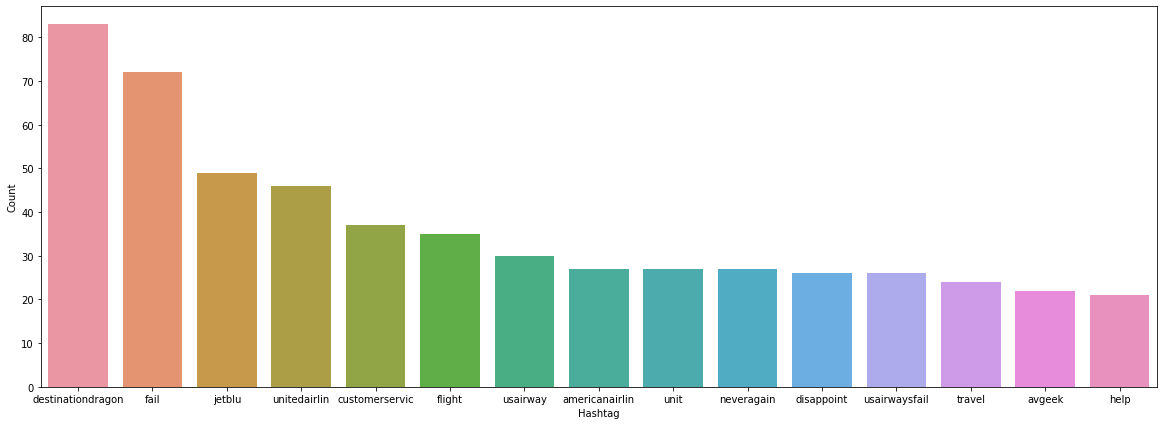

In [50]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 15 most frequent hashtags  

d = d.nlargest(columns="Count", n = 15) 
plt.figure(figsize=(20, 7))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [51]:
tweets_df = pd.read_csv('train.csv')
tweets_df = tweets_df[['text', 'airline_sentiment']]

#remove words which are starts with @ symbols
tweets_df['text'] = tweets_df['text'].map(lambda x:re.sub('@\w*','',str(x)))

#remove special characters except [a-zA-Z]
tweets_df['text'] = tweets_df['text'].map(lambda x:re.sub('[^a-zA-Z]',' ',str(x)))

#remove link starts with https
tweets_df['text'] = tweets_df['text'].map(lambda x:re.sub('http.*','',str(x)))

In [52]:
#tweets_df['text'] = tweets_df['text'].apply(remove_stopwords).apply(remove_mentions)

X = tweets_df['text']
y = tweets_df['airline_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=37)

In [1]:
tk = Tokenizer(num_words= 10000,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

def one_hot_seq(seqs, nb_features = 10000):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_oh, y_train_oh, test_size=0.1, random_state=37)

assert X_valid.shape[0] == y_valid.shape[0]
assert X_train_rest.shape[0] == y_train_rest.shape[0]

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical

# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers

In [ ]:
drop_model = models.Sequential()
drop_model.add(layers.Dense(64, init = 'uniform', activation='relu', input_shape=(10000,)))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(64,init = 'uniform', activation='relu'))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(3, activation='softmax'))
#drop_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print(drop_model.summary())

In [ ]:
drop_model = models.Sequential()
drop_model.add(layers.Dense(64, init = 'uniform', activation='relu', input_shape=(10000,)))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(64,init = 'uniform', activation='relu'))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(3, activation='softmax'))
#drop_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print(drop_model.summary())

In [ ]:
drop_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
drop_model.fit(X_train_rest,y_train_rest, batch_size = 64, nb_epoch = 10)

In [ ]:
# from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# cm = confusion_matrix(y_test, y_train_le)
# cm